In [7]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tifffile as tf
import math
import matplotlib as mpl
from skimage import io
## Ach
file_folder_list_1 = ['20230417-nsyb-G7f-rAch1h/fly2',
                        '20230420-nsyb-G7f-rAch1h/fly2',
                        '20230420-nsyb-G7f-rAch1h/fly3',
                        '20230428-nsyb-G7f-rAch1h/fly1',
                        '20230507-nsyb-G7f-rAch1h/fly1',
                        '20230510-nsyb-G7f-rAch1h/fly1',
                        '20230510-nsyb-G7f-rAch1h/fly2',
                        '20230511-nsyb-G7f-rAch1h/fly2',
                        '20230511-nsyb-G7f-rAch1h/fly3',
                        '20230515-nsyb-G7f-rAch1h/fly1']

## 5HT
file_folder_list_2 = ['20230429-nsyb-G7f-r5HT1.0/fly1',
                        '20230506-nsyb-G7f-r5HT1.0/fly1',
                        '20230513-nsyb-G7f-r5HT1.0/fly1',
                        '20230513-nsyb-G7f-r5HT1.0/fly2',
                        '20230516-nsyb-G7f-r5HT1.0/fly2',
                        '20230516-nsyb-G7f-r5HT1.0/fly4',
                        '20230517-nsyb-G7f-r5HT1.0/fly1',
                        '20230601-nsyb-G7f-r5HT1.0/fly1',
                        '20230601-nsyb-G7f-r5HT1.0/fly3',
                        '20230603-nsyb-G7f-r5HT1.0/fly1']
# only left part
br_index = np.array([64,65,66,55,72,73,74,63,84,59,4,23,26,56,79,75,76,77,60,80,82,85,67])
br_name = np.array(['MBPED_L','MBVL_L','MBML_L','LH_L',
                    'SLP_L','SIP_L','SMP_L','CRE_L','SCL_L','ICL_L',
                    'NO','EB','FB','LAL_L','AOTU_L','AVLP_L','PVLP_L',
                    'IVLP_L','VES_L','GOR_L','SPS_L','EPA_L','FLA_L'])
br_olf = np.array([1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
num_region = len(br_index)
if_save = True

In [8]:
# ach
data_path = '../../../results/3.odor_random_90_times_OCT_MCH_EA_new/nsyb-G7f-rAch1h'
file_folders = file_folder_list_1
atlas_z_range = range(13,38)
num_channel = 2

the_path_1 = data_path
list_file = file_folder_list_1
filename_1_1 = 'figure/raw/response_C2_odor1_std.tif'
filename_1_2 = 'figure/raw/response_C2_odor2_std.tif'
filename_1_3 = 'figure/raw/response_C2_odor3_std.tif'
filename_2_1 = 'figure/raw/response_C3_odor1_std.tif'
filename_2_2 = 'figure/raw/response_C3_odor2_std.tif'
filename_2_3 = 'figure/raw/response_C3_odor3_std.tif'

list_fly = [1,5,6,8,9]
# list_fly = [0,1,2,3,4,5,6,7,8,9]
num_fly = len(list_fly)

# std of each region
sta_mean_response_1 = np.zeros((num_fly,num_channel,num_region))
for i,id in enumerate(list_fly):
    # load atlas
    the_atlas_eroded_path = data_path + '/' + file_folders[id] + '/' + 'align_to_atlas' + '/'+'Transformed_atlas_eroded_r5.tif'
    atlas_eroded= tf.imread(the_atlas_eroded_path)
    atlas_eroded = np.transpose(atlas_eroded,[1,2,0])
    atlas_eroded = atlas_eroded[:,:,atlas_z_range]
    # load data
    data_1_1 = io.imread(the_path_1+'/'+list_file[id]+'/'+filename_1_1)
    data_1_1 = np.transpose(data_1_1,[1,2,0])
    data_1_2 = io.imread(the_path_1+'/'+list_file[id]+'/'+filename_1_2)
    data_1_2 = np.transpose(data_1_2,[1,2,0])
    data_1_3 = io.imread(the_path_1+'/'+list_file[id]+'/'+filename_1_3)
    data_1_3 = np.transpose(data_1_3,[1,2,0])
    data_1 = (data_1_1+data_1_2+data_1_3)/3
    data_1 = data_1/65535
    data_2_1 = io.imread(the_path_1+'/'+list_file[id]+'/'+filename_2_1)
    data_2_1 = np.transpose(data_2_1,[1,2,0])
    data_2_2 = io.imread(the_path_1+'/'+list_file[id]+'/'+filename_2_2)
    data_2_2 = np.transpose(data_2_2,[1,2,0])
    data_2_3 = io.imread(the_path_1+'/'+list_file[id]+'/'+filename_2_3)
    data_2_3 = np.transpose(data_2_3,[1,2,0])
    data_2 = (data_2_1+data_2_2+data_2_3)/3
    data_2 = data_2/65535
    for j in range(num_region):
        r1 = data_1[atlas_eroded==br_index[j]]
        if np.size(r1,0)==0:
            sta_mean_response_1[i,:,j]=np.nan
            continue
        r2 = data_2[atlas_eroded==br_index[j]]
        sta_mean_response_1[i,0,j] = np.nanmean(r1)
        sta_mean_response_1[i,1,j] = np.nanmean(r2)
    print('fly '+str(id) + ' done!')


fly 1 done!
fly 5 done!
fly 6 done!
fly 8 done!
fly 9 done!


In [9]:
# 5ht
data_path = '../../../results/3.odor_random_90_times_OCT_MCH_EA_new/nsyb-G7f-r5HT1.0'
file_folders = file_folder_list_2
atlas_z_range = range(13,38)
num_channel = 2

the_path_1 = data_path
list_file = file_folder_list_2
filename_1_1 = 'figure/raw/response_C2_odor1_std.tif'
filename_1_2 = 'figure/raw/response_C2_odor2_std.tif'
filename_1_3 = 'figure/raw/response_C2_odor3_std.tif'
filename_2_1 = 'figure/raw/response_C3_odor1_std.tif'
filename_2_2 = 'figure/raw/response_C3_odor2_std.tif'
filename_2_3 = 'figure/raw/response_C3_odor3_std.tif'

list_fly = [0,1,2,3,4,5,6,7,8,9]
num_fly = len(list_fly)

# std of each region
sta_mean_response_2 = np.zeros((num_fly,num_channel,num_region))
for i,id in enumerate(list_fly):
    # load atlas
    the_atlas_eroded_path = data_path + '/' + file_folders[id] + '/' + 'align_to_atlas' + '/'+'Transformed_atlas_eroded_r5.tif'
    atlas_eroded= tf.imread(the_atlas_eroded_path)
    atlas_eroded = np.transpose(atlas_eroded,[1,2,0])
    atlas_eroded = atlas_eroded[:,:,atlas_z_range]
    # load data
    data_1_1 = io.imread(the_path_1+'/'+list_file[id]+'/'+filename_1_1)
    data_1_1 = np.transpose(data_1_1,[1,2,0])
    data_1_2 = io.imread(the_path_1+'/'+list_file[id]+'/'+filename_1_2)
    data_1_2 = np.transpose(data_1_2,[1,2,0])
    data_1_3 = io.imread(the_path_1+'/'+list_file[id]+'/'+filename_1_3)
    data_1_3 = np.transpose(data_1_3,[1,2,0])
    data_1 = (data_1_1+data_1_2+data_1_3)/3
    data_1 = data_1/65535
    data_2_1 = io.imread(the_path_1+'/'+list_file[id]+'/'+filename_2_1)
    data_2_1 = np.transpose(data_2_1,[1,2,0])
    data_2_2 = io.imread(the_path_1+'/'+list_file[id]+'/'+filename_2_2)
    data_2_2 = np.transpose(data_2_2,[1,2,0])
    data_2_3 = io.imread(the_path_1+'/'+list_file[id]+'/'+filename_2_3)
    data_2_3 = np.transpose(data_2_3,[1,2,0])
    data_2 = (data_2_1+data_2_2+data_2_3)/3
    data_2 = data_2/65535
    for j in range(num_region):
        r1 = data_1[atlas_eroded==br_index[j]]
        if np.size(r1,0)==0:
            sta_mean_response_2[i,:,j]=np.nan
            continue
        r2 = data_2[atlas_eroded==br_index[j]]
        sta_mean_response_2[i,0,j] = np.nanmean(r1)
        sta_mean_response_2[i,1,j] = np.nanmean(r2)
    print('fly '+str(id) + ' done!')


fly 0 done!
fly 1 done!
fly 2 done!
fly 3 done!
fly 4 done!
fly 5 done!
fly 6 done!
fly 7 done!
fly 8 done!
fly 9 done!


In [10]:
the_path_1 = '../results/Ach-ver16/figures-for-ver16-final6/std_statistics'
the_save_path_1 = the_path_1
folder = os.path.exists(the_save_path_1)
if not folder:
    os.makedirs(the_save_path_1)

In [11]:
data_g7f = np.concatenate((np.squeeze(sta_mean_response_1[:,0,:]),\
                            np.squeeze(sta_mean_response_2[:,0,:])),\
                            axis = 0)
data_ach = np.squeeze(sta_mean_response_1[:,1,:])
data_5ht = np.squeeze(sta_mean_response_2[:,1,:])
print(np.shape(data_g7f))
print(np.shape(data_ach))
print(np.shape(data_5ht))

(15, 23)
(5, 23)
(10, 23)


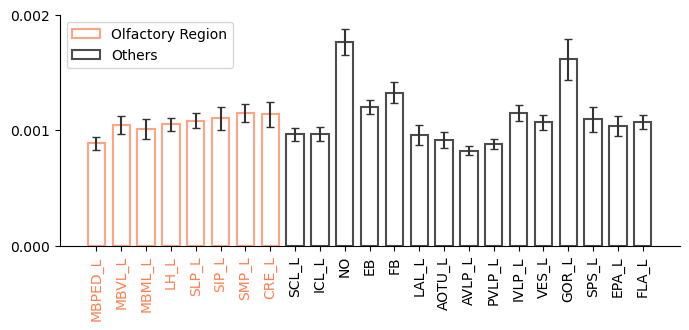

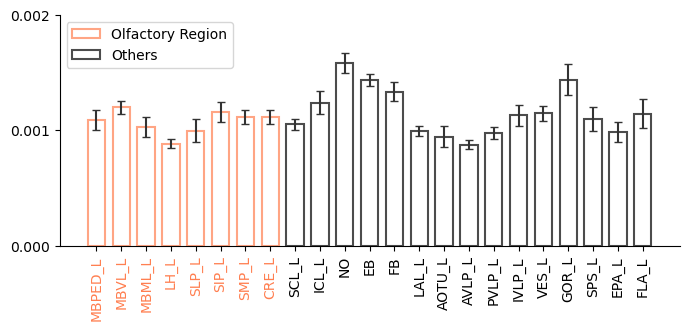

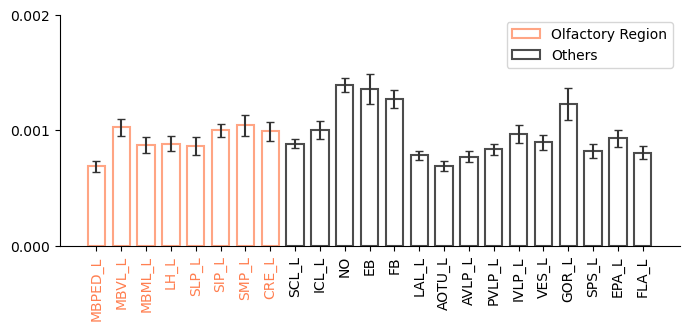

In [12]:
for i in range(3):
    if i==0:
        mean_response = data_g7f
    elif i==1:
        mean_response = data_ach
    else:
        mean_response = data_5ht

    num_fly = np.size(mean_response,0)
    the_mean = np.zeros(len(br_index))
    the_std = np.zeros(len(br_index))
    for j in range(len(br_index)):
        aa = np.squeeze(mean_response[:,j])
        the_mean[j] = np.nanmean(aa)
        the_std[j] = np.nanstd(aa,ddof = 1)/math.sqrt(len(aa[~np.isnan(aa)]))
    plt.figure(figsize = (8,3))
    ax = plt.axes()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.bar(np.squeeze(np.where(br_olf==1)), the_mean[br_olf==1], width=0.7,yerr = the_std[br_olf==1],error_kw = {'ecolor' : '0.2', 'capsize' :3 },
                        alpha=0.7,facecolor = 'white',edgecolor='coral',linewidth=1.5,label = 'Olfactory Region')
    plt.bar(np.squeeze(np.where(br_olf==0)), the_mean[br_olf==0], width=0.7,yerr = the_std[br_olf==0],error_kw = {'ecolor' : '0.2', 'capsize' :3 },
                        alpha=0.7,facecolor = 'white',edgecolor='black',linewidth=1.5,label = 'Others')
    plt.xticks(range(len(br_index)),br_name,rotation=90)
    plt.legend()
    plt.ylim((0,0.002))
    plt.yticks([0,0.001,0.002])
    for j in range(len(br_index)):
        if br_olf[j]==1:
            plt.gca().get_xticklabels()[j].set_color('coral') 
    if if_save:
        mpl.rcParams['pdf.fonttype'] = 42
        mpl.rcParams['ps.fonttype'] = 42
        plt.savefig(the_save_path_1 + '/' + 'std_map' + '_C'+str(i)+'.pdf',dpi = 300,bbox_inches = 'tight')
        plt.savefig(the_save_path_1 + '/' + 'std_map' + '_C'+str(i)+'.png',dpi = 300,bbox_inches = 'tight')
        plt.show()  